## Условие 1: Задача 1

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

### 1.1. Скачать следующие данные: kc-house-data и laptop_price


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv', encoding='windows-1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Изучите стоимости недвижимости


In [3]:
df["price"].min(), df["price"].mean().round(2), df["price"].max()

(75000.0, 540088.14, 7700000.0)

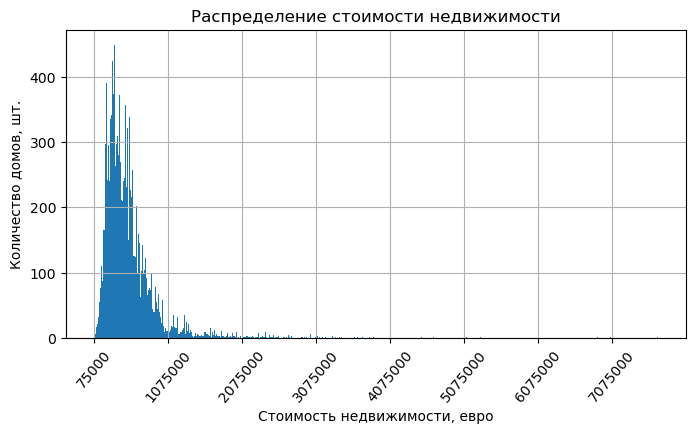

In [4]:
plt.figure(figsize=(8,4))

plt.hist(df['price'], bins=1000)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость недвижимости, евро')
plt.ylabel('Количество домов, шт.')
plt.ticklabel_format(style='plain')
plt.xticks(range(75000, 7700000, 1000000), rotation=50)
plt.grid();

#### Гистограмма показывает выраженное правостороннее расределение стоимости недвижимости, т.е. основная масса домов в данной выборке имеют стоимость в от 75 тыс. до 1 млн. евро, тем не менее имеется значительное количество объектов, чья стоимость существенно выше, что показывает очень длинный правый хвост.
#### Т.к. распределение выраженно асимметрично, можно сделать вывод, что мода, медиана и среднее значение цены на недвижимость отличаются между собой, при этом мода меньше медианы, которая в свою очередь меньше средней стоимости. Так мода составляет примерно 350-400 тыс. евро за дом и является самым высокочастотным значением цены на дом. Значение медианы должно быть выше указанной цены, предположительно около 450 тыс. евро, средняя стоимость жилья должна быть еще выше (540 тыс. евро).

### 1.3. Изучите распределение квадратуры жилой площади


In [5]:
df["sqft_living"].min(), df["sqft_living"].mean().round(2), df["sqft_living"].max()

(290, 2079.9, 13540)

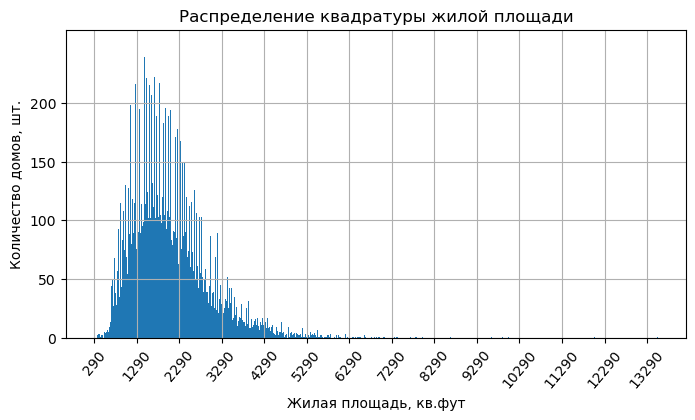

In [6]:
plt.figure(figsize=(8,4))

plt.hist(df['sqft_living'], bins=1000)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь, кв.фут')
plt.ylabel('Количество домов, шт.')
plt.ticklabel_format(style='plain')
plt.xticks(range(290, 13540, 1000), rotation=50)
plt.yticks(range(0, 250, 50))
plt.grid();

#### Квадратура жилой площади также представлена выраженным правосторонним распределением. Основная масса домов имеет площадь между 300 и 3300 кв. футов. Тем не менее гистограмма показывает очень длинный правый хвост, т.е. есть большое количество недвижимости с площадью значительно больше средних показателей. 
#### Мода должна быть меньше медианы, которая в свою очередь меньше среднего значения жилой площади. Мода составляет примерно 1500 кв. футов (самая высокая колонка гистограммы), среднее значение составляет примерно 2080 кв.футов, медиана немного меньше, скорее всего примерно 1800 кв. футов (т.е. половина домов в выборке имеют жилую площадь менее 1800 кв. футов, в то время как вторая половина больше и значительно больше).

### 1.4. Изучите распределение года постройки

In [7]:
df["yr_built"].min(), df["yr_built"].mean().round(2), df["yr_built"].max()

(1900, 1971.01, 2015)

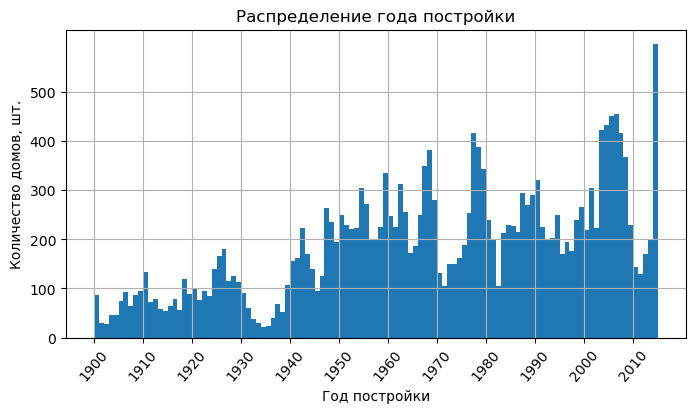

In [8]:
plt.figure(figsize=(8,4))

plt.hist(df['yr_built'], bins=115)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов, шт.')
plt.ticklabel_format(style='plain')
plt.xticks(range(1900, 2015, 10), rotation=50)
plt.yticks(range(0, 600, 100))
plt.grid();

In [9]:
data = df['yr_built'].value_counts()
data

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

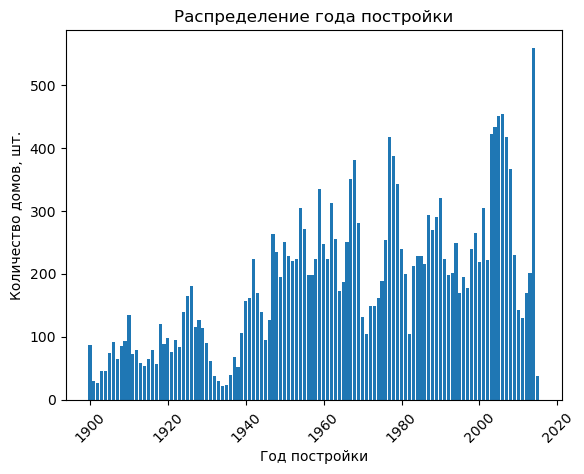

In [10]:
plt.bar(data.index, data)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов, шт.')
plt.xticks(rotation=45);

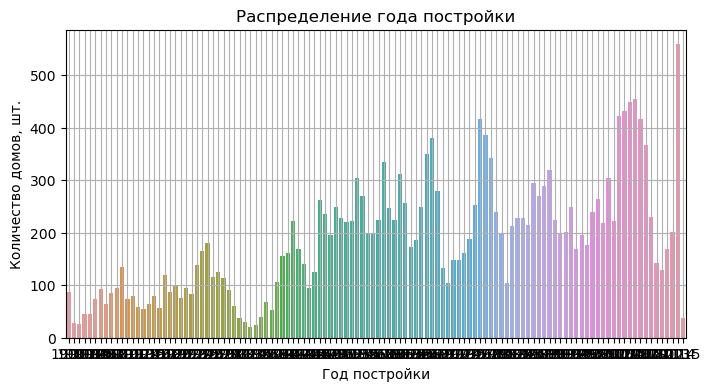

In [11]:
plt.figure(figsize=(8,4))

sns.barplot(x=data.index, y=data)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов, шт.')
plt.grid();

#### Согласно данным на гистограмме и столбчатой диаграмме, нет четко выраженного типа распределения для годов постройки домов. В целом имеет место левостороннее распределение. Общая тендеция: рост количества домов с каждым годом. Так в 2015 году, самом последнем году в представленной выборке, представлено больше всего домов, порядка 580. Тем не менее каждый год количество домов разное, и есть период с 1932 по 1939 гг. значительного провала в количестве домов. 

## Условие 2: 2 задача
### 2.1. Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы


In [15]:
data = df['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

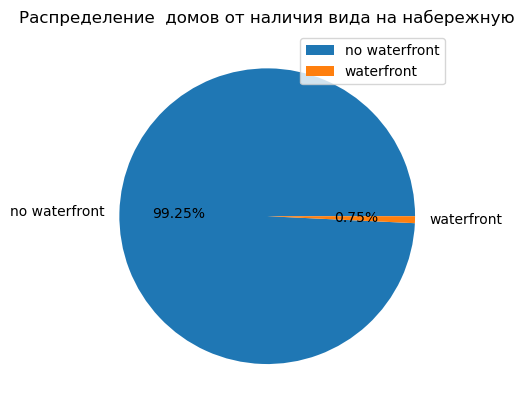

In [17]:
options = ['no waterfront', 'waterfront']
plt.pie(data, labels=options, autopct='%.2f%%')
plt.title('Распределение  домов от наличия вида на набережную')

plt.legend(options)
plt.show();

#### Есть менее 1% домов, имеющих вид на набережную.

In [18]:
print(f'Средняя стоимость жилья с видом на набережную {df[df["waterfront"] == 1]["price"].mean().round(2)} евро')
print(f'Средняя стоимость жилья без вида на набережную {df[df["waterfront"] == 0]["price"].mean().round(2)} евро')

Средняя стоимость жилья с видом на набережную 1661876.02 евро
Средняя стоимость жилья без вида на набережную 531563.6 евро


#### Стоимость жилья с видом на набережную в среднем в 3 раза выше, чем жилья без вида на воду.

### 2.2. Изучите распределение этажей домов


In [19]:
data_floors = df['floors'].value_counts()
data_floors

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

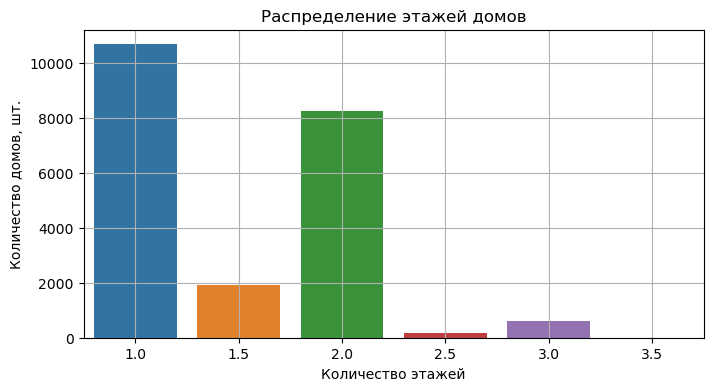

In [20]:
plt.figure(figsize=(8,4))

sns.barplot(x=data_floors.index, y=data_floors)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов, шт.')
plt.grid();

#### Больше всего в выборке одноэтажных домов, их примерно 10300. Далее идут двухэтажные дома, которые примерно 8100 штук. Домов с другим количеством этажей значительно меньше. Максимальное количество этажей в выборке 3,5.

### 2.3. Изучите распределение состояния домов

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
data_cond = df['condition'].value_counts()
data_cond

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

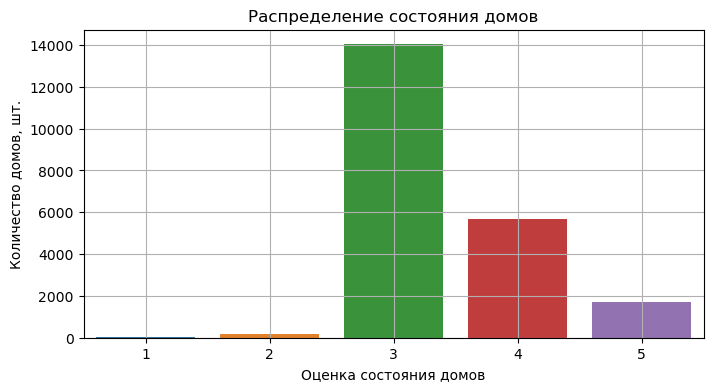

In [23]:
plt.figure(figsize=(8,4))

sns.barplot(x=data_cond.index, y=data_cond)
plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния домов')
plt.ylabel('Количество домов, шт.')
plt.grid();

#### Состояние большинства домов оценивается как удовлетворительное, таких домов примерно 14 тыс. На втором месте дома в хорошем состоянии:их в 2,5 раза меньше в данной выборке, всего около 5800 шт. Домов в отличном состоянии около 1800 шт. Домов в неудовлетворительном и очень плохом состоянии очень мало. 

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


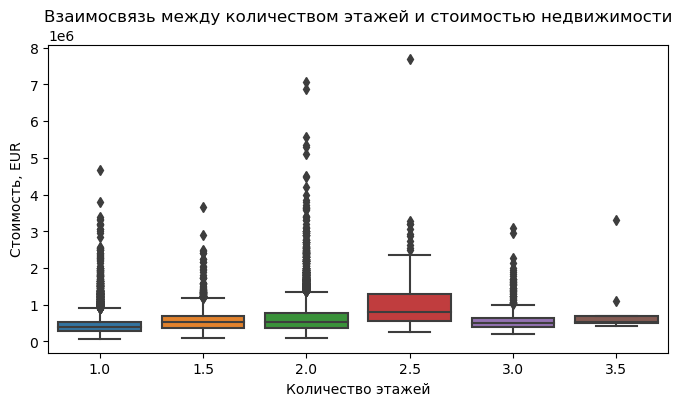

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(x = df['floors'], y = df['price'])
plt.title('Взаимосвязь между количеством этажей и стоимостью недвижимости')
plt.ylabel('Стоимость, EUR')
plt.xlabel('Количество этажей');

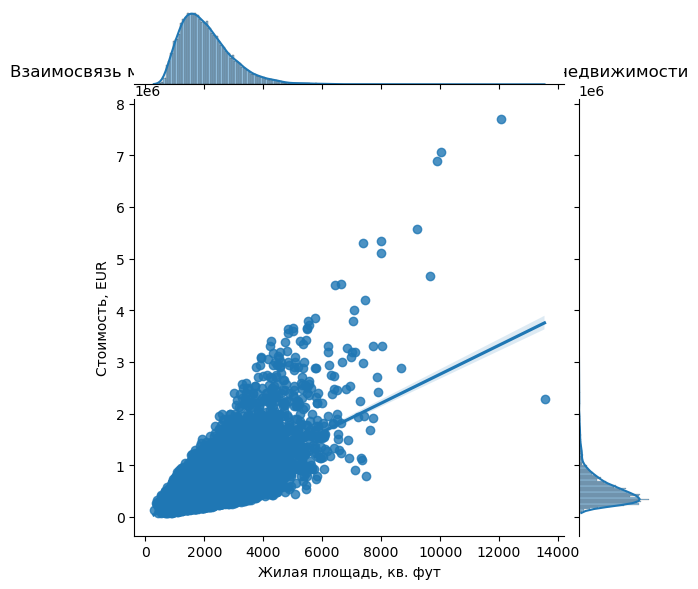

In [25]:
sns.jointplot(x = df['sqft_living'], y = df['price'], kind='reg')
plt.title('Взаимосвязь между размером жилой площади и стоимостью недвижимости')
plt.ylabel('Стоимость, EUR')
plt.xlabel('Жилая площадь, кв. фут');

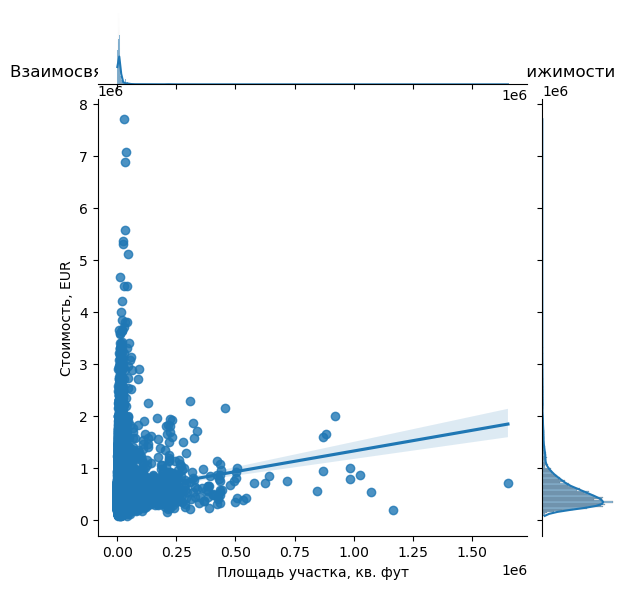

In [26]:
sns.jointplot(x = df['sqft_lot'], y = df['price'], kind='reg')
plt.title('Взаимосвязь между размером участка и стоимостью недвижимости')
plt.ylabel('Стоимость, EUR')
plt.xlabel('Площадь участка, кв. фут');

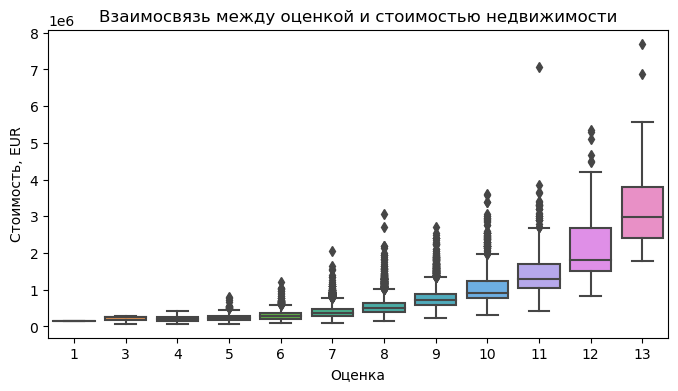

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(x = df['grade'], y = df['price'])
plt.title('Взаимосвязь между оценкой и стоимостью недвижимости')
plt.ylabel('Стоимость, EUR')
plt.xlabel('Оценка');

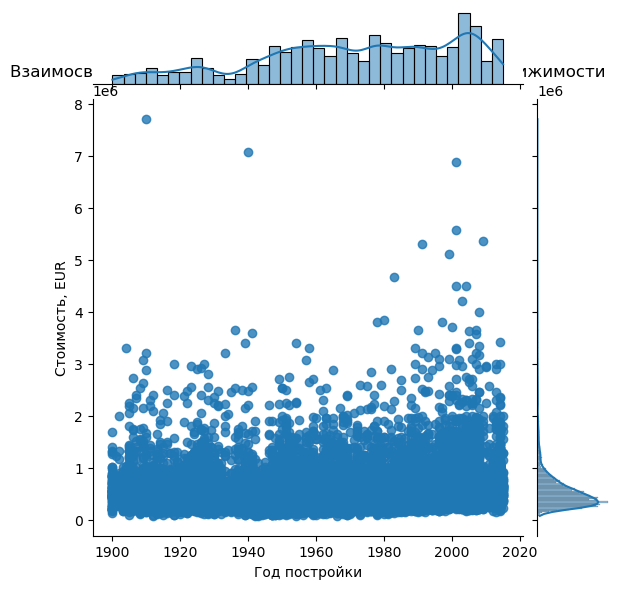

In [28]:
sns.jointplot(x = df['yr_built'], y = df['price'], kind='reg')
plt.title('Взаимосвязь между годом постройки и стоимостью недвижимости')
plt.ylabel('Стоимость, EUR')
plt.xlabel('Год постройки');

In [29]:
df_corr = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built']].corr().round(2)
df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05
bedrooms,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15
bathrooms,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51
sqft_living,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05
floors,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49
waterfront,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03
view,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05
condition,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36
grade,0.67,0.36,0.66,0.76,0.11,0.46,0.08,0.25,-0.14,1.00,0.76,0.17,0.45


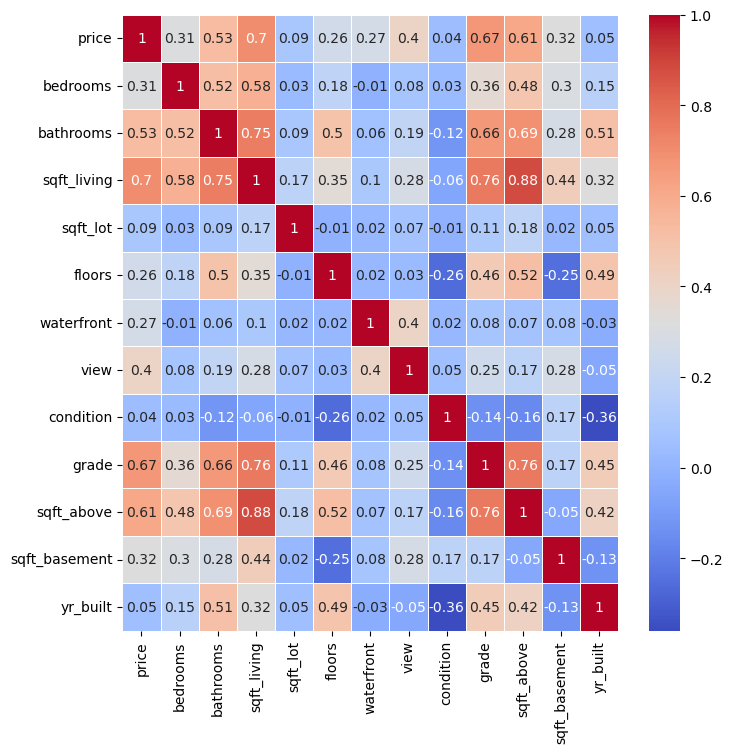

In [31]:
plt.figure(figsize = (8, 8))
sns.heatmap(df_corr, annot=True, linewidths=0.5, cmap='coolwarm');

#### Количество этажей влияет на стоимость недвижимости: цена растет при увеличении количества этажей до 2,5, после чего цена снижается. Вероятно, дома с 3 и более этажами менее комфортны для людей, не подходят для пожилых людей и других категорий, в связи с чем их стоимость ниже, чем цена домов с 2-2,5 этажами.
#### Есть прямая взаимосвязь между размером жилой площади и стоимостью недвижимости: чем больше жилая площадь, тем выше стоимость домов. Зависимость очевидна, т.к. затраты на постройку дома большей площади выше, но и комфортность дома значительно лучше, соответственность цена повышается.
#### Зависимость стоимости недвижимости от размера участка неочевидна,выявлена лишь слабая положительная корреляци, что можно объяснить тем, что сам участок без качественной застройки и дополнительных положительных характеристик не влияет значительным образом на стоимость недвижимости.
#### Оценка дома напрямую выраженно влияет на его стоимость, что объясняется тем, что оценка складывается из всех возможных характеристик недвижимости, т.е. чем больше положительных характеристик, тем выше оценка и, соответственно, это отражено в цене дома.
#### Год постройки дома не влияет напрямую на его стоимость. Это можно объяснить тем, что на цену в большей степени должно влиять качество постройки, а также проведение реновации. Также более старые дома обычно находятся в более старых и развитых районах, а более новые дома могут быть более современными и комфортными. Это разные характеристики, которые могут быть оценены разными людьми по-разному в зависимости от потребностей и предпочтений.

#### Согласно тепловой карте и коэффициентам корреляции, на стоимость недвижимости напрямую влияют оценка дома, жилая площадь, площадь верхнего этажа, количество ванных комнат и вид. Остальные показатели не оказывают выраженного влияния на цену дома. 